

# SVM: Support Vector Machines

<img src="http://zacharski.org/files/courses/cs419/svm/buckaroo.png" width="600"/>

The relevance of the 8th dimension in the picture will be seen shortly.

I first heard about support vector machines years ago. I was working in a lab in New Mexico and there was some guy in the psych department who developed a computer program to detect plagiarism in student essays. He formed a company with a few others and made big bucks. His approach used support vector machines and at the time they seemed mysterious and hard to me. 

It turns out they are not so mysterious or hard. Well, the math is a bit hard, but for this notebook let's ignore it. (always a good approach for things that are hard in life).




## finding a separting line

<p><div style="float:right;margin-left:5px;"><img src="http://zacharski.org/files/courses/cs419/svm/svm05.png" width="300"/></div></p>

What SVMs do is find a line (called a **hyperplane** -- remember that word **HYPERPLANE**) that separates data into the correct classes. A hyperplane is a subspace that is one dimension less than the ambient space. So if you have a 2 dimensional space the hyperplane is a line. 

Suppose we have data in two classes that looks like this:

<img src="http://zacharski.org/files/courses/cs419/svm/svm01.png" width="400"/>

What SVMs do is define a line that separates the 2 classes:
<img src="http://zacharski.org/files/courses/cs419/svm/svm02.png" width="400"/>

There can be many possible lines drawn between 2 classes:

<img src="http://zacharski.org/files/courses/cs419/svm/svm03.png" width="400"/>

So what do you think?

Which is the best line?

* the purple line
* the red line
* the green line
* ???

If you said the green line, you would be correct. 

Why is this the best line? Because it maximizes the distance to the nearest points. In SVM circles this distance is called the **margin** and I try to show this with my little black distance lines.

<img src="http://zacharski.org/files/courses/cs419/svm/svm04.png" width="400"/>


<p><div style="float:right;margin-left:5px;"><img src="http://zacharski.org/files/courses/cs419/svm/bucky.jpg" width="500"/></div></p>
So the SVM finds the line that maximizes the margin!  It is sort of like a margin in a word processing document. We are trying to maximize the distance between the line (in my analogy like the edge of the paper) and text (in this case the *x* and *o* data points. 

For these hand-drawn plots we examined data that had two features (two columns in our table) and two classes. Maybe it was sepal length and width for irises (either Iris setosa or Iris virginica, which grows, as the name suggests, in a place called *Virginia*), or height and weight of athletes (either basketball players or gymnasts). Because we have 2 features we can represent the data in 2 dimensions, **and** we can separate instances of the two classes by a straight line. Instead of 2 features suppose we had 3. Perhaps the iris dataset had sepal length width and thickness. Now the data points are in 3 dimensional space. Imagine some fancy holographic display where we can see the datapoints in space above a table. Now what separates the points in one class from another is not a line, but a hyperplane like a sheet of paper. We all can imagine this pretty easily. 

Now imagine a dataset with four features. We represent the data in four dimensional space and the hyperplane is also 4D. Some people (me included) have a hard time visualizing 4 dimensional objects so often 4 dimensional data is represented in a 3 dimensional plot with the fourth dimension represented by the color of the datapoint: 

<img src="http://zacharski.org/files/courses/cs419/svm/4d.png" width="400"/>

So that helps us visualize 4d data. We can imagine the hyperplane to be a shaded box that we can see inside to view the datapoints that it contains. When we get to 5 or 6 dimensions it gets significantly difficult to visualize the data and the hyperplane.

Toward the end of this Notebook we will be working with data that have over 38,000 features so we will be working in 38,000 dimensional space and computing 38,000 dimensional hyperplanes. **This is insanely cool!**



## SVM in SKLEARN

Let's start with something simple and 2 dimensional --the height and weight of athletes in the Women's NBA and Women's Gymnastics.

And let's load the data, which spans from Kōko Tsurumi who is 4'7" and weighs 71 pounds to Ruth Hamblin who is 6'6" and weighs 227.

In [12]:
import pandas as pd
import numpy as np
athletes = pd.read_csv('https://raw.githubusercontent.com/zacharski/machine-learning/master/data/athletes-gb.csv')
athletes = athletes.set_index('Name')
X = athletes[['Height', 'Weight']]
#y = athletes['Sport']
athletes['class'] = np.where(athletes['Sport']=='Basketball', 1, 0)
athletes
y = athletes['class']


and let's graph that out...

In [13]:
from bokeh.charts import Scatter, output_file, show
from bokeh.io import push_notebook, show, output_notebook
output_notebook()
x = Scatter(athletes, x='Height', y='Weight', title="Height and Weight of Women Athletes",
            xlabel="Height in Inches", ylabel="Weight in Pounds", color='Sport')

output_file("athletes.html")

show(x)

Loading BokehJS ...

Ok. This looks pretty easy to separate.  The red basketball players seem heavier and taller than the green gymnasts.
Let's  create an SVM classifier and train it.


In [58]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Notice that when we created the classifier we specified a linear kernel:

    clf = svm.SVC(kernel='linear')
    
That will make the classifier construct a nice, straight line (or hyperplane). 

Ok. now that we created and trained the classifier, let's look at the line it drew. There is probably a much easy way to create the plot (and create a more attractive plot) but this is the convoluted way I came up with (this is from the sklearn documentation).


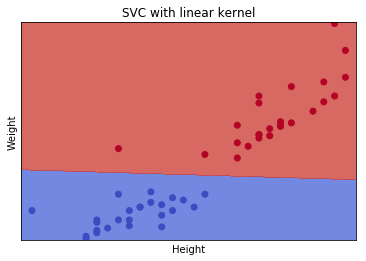

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# create a mesh to plot in data.iloc[:,:1]
h = .02  # step size in the mesh
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('SVC with linear kernel')


plt.show()

Before moving on, let me show you one more example, the Iris Data Set (this again is from the sklearn documentation). Recall that we are trying to determine the type of Iris (there are 3 types) using Sepal Length and Width.

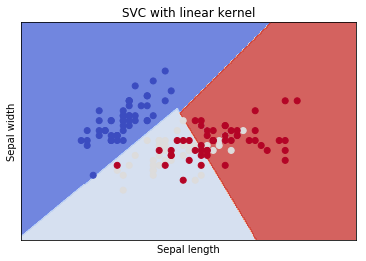

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target
h = .02  # step size in the mesh

C = 1.0  # SVM regularization parameter
clf = svm.SVC(kernel='linear', C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('SVC with linear kernel')

plt.show()

## SVM kernels

So if are trying to separate 2 classes we will have a single straight line. 

#### What do you think about the following? 
Can we create a linear SVM (one that creates a straight line) that separates the classes?


<img src="http://zacharski.org/files/courses/cs419/svm/svm14.png" width="400"/>

I'd say no.

But there is a trick we can do. Right now the data has two features, x and y. And the SVM takes those features and creates a classifier that labels the instances as a circle or an x.


<img src="http://zacharski.org/files/courses/cs419/svm/svm15.png" width="400"/>

Suppose we get clever and create a brand new feature, z, which we define as

### $$z=x^2+y^2$$

Now our SVM uses those features to make the classification:

<img src="http://zacharski.org/files/courses/cs419/svm/svm16.png" width="400"/>

And let's return to the question of *Can we draw a straight line that separates the classes?* and we see we can. Let's plot out x and z.

<img src="http://zacharski.org/files/courses/cs419/svm/svm17.png" width="400"/>

So now we can draw a straight line. So if we can be inventive and create new features which are functions of the original features, we might be able to use an SVM.

### However, this requires us to be clever

The steps we just did were

1. look at the data
2. be creative and come up with a formula to use for a new feature
3. use that new feature with our classifier

If we have a new problem


### $$z=x^2+y^2$$

probably won't work so we will need to come up with a new formula. Maybe:

### $$z=(x - 200)^2+(y-250)^2$$

or some other formula.



Any approach that requires us to be math creative seems like probably not the best idea. 

### And here is the amazing thing about SVM:

#### The beauty of SVM is that it does this work for us. 
This transformation from a low-dimensional problem to a higher one is done by what is called **a kernel**. It looks like this:

<img src="http://zacharski.org/files/courses/cs419/svm/svm19.png" width="600"/>


At the start we might just have two features: *x* and *y* and the kernel **automagically** expands them to a larger set of features. With the original dimensions, the problem was not linearly separable, but it is separable in the larger dimensional space. This, as my sad drawing shows, is called the **kernel trick**. It's really cool!

## Kernels




The [SKlearn Support Vector Machine page](http://scikit-learn.org/stable/modules/svm.html) provides general information about Support Vector Machines. It also provides nice examples of how to work with plots! [A link on that page](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)  takes us to information about the classifier we just used, SVC (Support Vector Classifier)

### the plot of our original SVM classifier (using the linear kernel:

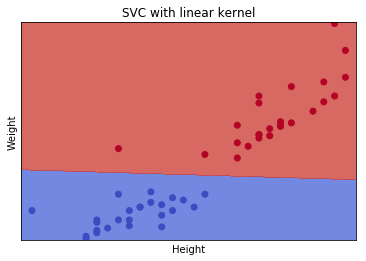

In [60]:
import pandas as pd
athletes = pd.read_csv('https://raw.githubusercontent.com/zacharski/machine-learning/master/data/athletes-gb.csv')
athletes = athletes.set_index('Name')
X = athletes[['Height', 'Weight']]
#y = athletes['Sport']
athletes['class'] = np.where(athletes['Sport']=='Basketball', 1, 0)
athletes
y = athletes['class']

from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

import matplotlib.pyplot as plt
import numpy as np

# create a mesh to plot in data.iloc[:,:1]
h = .02  # step size in the mesh
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('SVC with linear kernel')


plt.show()


### the RBF kernel 
Here's the decision boundary using an RBF kernel.

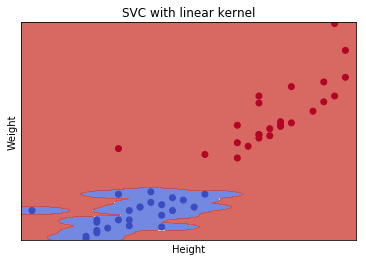

In [56]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import svm
poly_svc = svm.SVC(kernel='poly').fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.3, C=2).fit(X, y)
# create a mesh to plot in data.iloc[:,:1]
h = .02  # step size in the mesh
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))
Z = rbf_svc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('SVC with linear kernel')


plt.show()

### Nice and curvy!


# Parameters for SVM

We have already seen that one parameter for SVMs is the kernel we wish to use. So far we used a linear kernel and the RBF one. Check the documentation to see what all the options are.

Another parameter is C

## C
C controls the tradeoff between the smoothness of the decision boundary and how many data points are classified correctly.  The larger the C the more curvy the boundary. The SKlearn documentation puts it this way:

"he C parameter trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly by giving the model freedom to select more samples as support vector"

You might think that correctly 

## Gamma
The SKlearn documentation says "Intuitively, the gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors."

sklearn gives nice demo code illustrating this differences obtained by adjusting C and gamma:



The best parameters are {'C': 1.0, 'gamma': 0.10000000000000001} with a score of 0.97


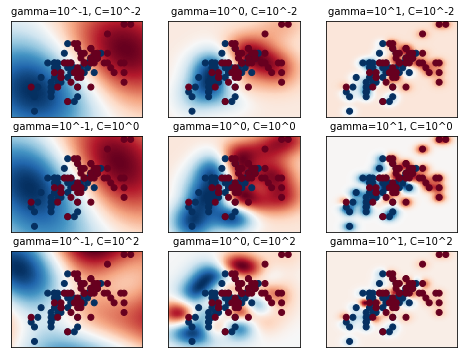

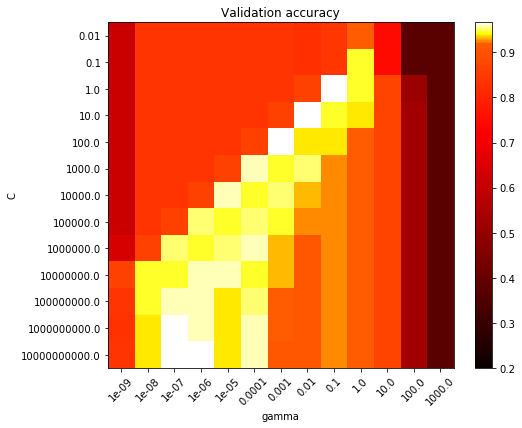

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV


# Utility function to move the midpoint of a colormap to be around
# the values of interest.

class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))
    
    
iris = load_iris()
X = iris.data
y = iris.target

# Dataset for decision function visualization: we only keep the first two
# features in X and sub-sample the dataset to keep only 2 classes and
# make it a binary classification problem.

X_2d = X[:, :2]
X_2d = X_2d[y > 0]
y_2d = y[y > 0]
y_2d -= 1

# It is usually a good idea to scale the data for SVM training.
# We are cheating a bit in this example in scaling all of the data,
# instead of fitting the transformation on the training set and
# just applying it on the test set.

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_2d = scaler.fit_transform(X_2d)

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X, y)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

# Now we need to fit a classifier for all parameters in the 2d version
# (we use a smaller set of parameters here because it takes a while to train)

C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X_2d, y_2d)
        classifiers.append((C, gamma, clf))
        
plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))
for (k, (C, gamma, clf)) in enumerate(classifiers):
    # evaluate decision function in a grid
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # visualize decision function for these parameters
    plt.subplot(len(C_2d_range), len(gamma_2d_range), k + 1)
    plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)),
              size='medium')

    # visualize parameter's effect on decision function
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_2d, cmap=plt.cm.RdBu_r)
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight')

scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),
                                                     len(gamma_range))

# Draw heatmap of the validation accuracy as a function of gamma and C
#
# The score are encoded as colors with the hot colormap which varies from dark
# red to bright yellow. As the most interesting scores are all located in the
# 0.92 to 0.97 range we use a custom normalizer to set the mid-point to 0.92 so
# as to make it easier to visualize the small variations of score values in the
# interesting range while not brutally collapsing all the low score values to
# the same color.

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()

## Overfitting
When we used the RBF kernel above, we came up with a decision boundary that looked like:


<img src="http://zacharski.org/files/courses/cs419/svm/overfitting1.png" width="500"/>

Notice how squiggly that boundary is. Sometimes the boundary is too specific -- too tailor fit -- to the decision boundary. So when we classify new blue instances (in the lower left section) our classifier mis-classifies them:
<img src="http://zacharski.org/files/courses/cs419/svm/overfitting2.png" width="500"/>

This is called **overfitting**. When we train on data we want to *generalize* so we can classify new data. In overfitting the classifier represents every bump and blip in our training data. We want to minimize overfitting. The type of the kernel we use as well as the C and gamma parameters all affect overfitting.

<h1 style="color:red">Mini Project</h1>

You are going to use the same data you did for Bayes Text Classification: the Enron email data of the Chris and Sara emails. As with the last mini-project, this one (both the project and much of this writeup) is from Udacity.

<h2 style="color:red">Part 1</h2>
Load the Chris & Sara data.


<h3 style="color:red">Part 1b: comparing time</h3>
In the very first notebook we learned how to time a function. For example, if we had a function `foobar` we could get the execution time of the function with just one line of code.  We would like to compare the Naive Bayes Classifier and the SVM in the following:

 classifier | time to train | time to predict | prediction accuracy
  :---: | : ---: | :--: | :---:
  Naive Bayes | 0 min 0 sec | 0 min 0 sec | 0%
  SVM - linear kernel | 0 min 0 sec | 0 min 0 sec | 0%
  
  Once you determine the values, just edit this cell to put the information in the above table.
  
  
  **NOTE**: When we get the execution time of a function it returns:
  
      CPU times: user 14.4 s, sys: 50.9 s, total: 1min 5s
      Wall time: 2min 36s
      
You can use what makes sense to you. I used total CPU time.

**NOTE 2**: Use a linear kernel

<b style="color:red">Note 3: on my 2.6Ghz i7 16GB laptop this took nearly 2 hours of wall time to do. I ended up starting it and going for a walk in the woods. </b>

## Congratulations
**You just computed a hyperplane in 38,757 dimensions**

How long it takes to make a prediction could be important. If we are trying to classify something as an obstacle or not an obstacle for a self-driving car, execute speed would be a bit important. The Udacity course lists some of the following tasks that may be time critical:

* flagging credit card fraud, and blocking a transaction before it goes through
* voice recognition, like Siri

The time it takes to train a classifier is important when we are trying to adjust parameters to produce the best classifier. If we make some adjustment to gamma, for example, we don't want to wait hours to see the results.


<h2 style="color:red">Part 2: reduce the size of the training data set</h2>
So we can speed up both the training and the predicting phases by training on a smaller dataset. Obviously, the accuracy will not be as good so there is a tradeoff.  Let's train on 1% of the dataset:

       labels_train_small = labels_train[:int(len(labels_train)/100)] 
       features_train_small = features_train[:int(len(labels_train)/100)] 
       
What is the time and accuracy of the SVM now (still using a linear kernel)?

processing complete


<h2 style="color:red">Part 3: Using the RBF kernel</h2>
Using the same 1% data set, now use the rbf SVM kernel, which, as we learned produces more complex hyperplanes. What is the accuracy now?


<h2 style="color:red">Part 4: Adjusting the C parameter</h2>
Note: this text from Udacity:    
*"Keep the training set size and rbf kernel from the last [[part]], but try several values of C (say, 10.0, 100., 1000., and 10000.). Which one gives the best accuracy?"*

<h2 style="color:red">Part 5: Full Training Set</h2>
*"Now that you’ve optimized C for the RBF kernel, go back to using the full training set. In general, having a larger training set will improve the performance of your algorithm, so (by tuning C and training on a large dataset) we should get a fairly optimized result. What is the accuracy of the optimized SVM?"*

<h2 style="color:red">Part 6: Reflections</h2>


Now we have experimented with Naive Bayes and SVM methods for text classification. Do you think one is better than another for this task? 